
**Before you dive into the implementations, I highly recommend first learning the heart of each algorithm—its core idea and how it works. You can explore this through YouTube tutorials, books, or online courses. This repository is meant to complement that knowledge by showing how to translate concepts into working code.**

# Local Outlier Factor (LOF) for Anomaly Detection

LOF is an unsupervised anomaly detection algorithm that measures the local density deviation of a given data point with respect to its neighbors. It identifies outliers as data points that have a substantially lower density than their neighbors. In simpler terms, it finds points that are "isolated" relative to the local neighborhood around them.

## Key Concepts:

*   **Local Density:** The density of data points in the neighborhood around a given point. Denser neighborhoods have higher local density.
*   **k-Nearest Neighbors (k-NN):** LOF considers the *k* nearest neighbors of each data point to estimate its local density. The choice of *k* is a crucial parameter.
*   **Reachability Distance:** A measure of how "reachable" one point is from another. It helps to smooth out small fluctuations in distances and makes LOF more robust to noise.
*   **Local Reachability Density (LRD):** The inverse of the average reachability distance of a point from its *k*-nearest neighbors. It estimates the local density of a point.
*   **Local Outlier Factor (LOF):** The ratio of the average LRD of a point's *k*-nearest neighbors to the point's own LRD. This is the final anomaly score.

## How LOF Works:

1.  **Calculate Reachability Distances:** For each point A, calculate the reachability distance to each of its *k* nearest neighbors B. The reachability distance is defined as:

    `reachability_distance(A, B) = max(distance(A, B), k-distance(B))`

    Where:

    *   `distance(A, B)` is the standard distance between points A and B (e.g., Euclidean distance).
    *   `k-distance(B)` is the distance of point B to its *k*-th nearest neighbor.

2.  **Calculate Local Reachability Densities (LRDs):** For each point A, calculate its LRD:

    `LRD(A) = 1 / (average_reachability_distance(A, k-NN(A)))`

    Where `k-NN(A)` is the set of *k* nearest neighbors of A.

3.  **Calculate Local Outlier Factors (LOFs):** For each point A, calculate its LOF:

    `LOF(A) = average_LRD(k-NN(A)) / LRD(A)`

    This is the ratio of the average LRD of A's neighbors to A's own LRD.

## Interpreting the LOF Score:

*   **LOF ≈ 1:** Indicates that the point has a similar density to its neighbors. The point is likely a normal instance.
*   **LOF > 1:** Indicates that the point has a lower density than its neighbors. The higher the LOF value, the more likely the point is an outlier.
*   **LOF ≫ 1 (significantly greater than 1):** Indicates a strong outlier.

## Example (Conceptual):

Imagine a cluster of points densely packed together. A point far away from this cluster will have:

*   Larger reachability distances to its neighbors (because they are far away).
*   A lower LRD (because the average reachability distance is high).
*   A higher LOF (because the average LRD of its neighbors will be higher than its own LRD).

## Advantages of LOF:

*   **Local Outlier Detection:** It can detect outliers in clusters with varying densities.
*   **Intuitive Interpretation:** The LOF score provides a clear measure of how much a point deviates from its local neighborhood.
*   **No Assumptions about Data Distribution:** It doesn't assume any specific distribution of the data.

## Disadvantages of LOF:

*   **Computational Complexity:** Calculating distances to *k*-nearest neighbors can be computationally expensive for large datasets.
*   **Parameter Sensitivity:** The choice of *k* can significantly affect the results. A small *k* makes LOF more sensitive to local fluctuations, while a large *k* can smooth out local variations and mask outliers.
*   **Difficulty in High Dimensions:** Like many distance-based methods, LOF can suffer from the curse of dimensionality in very high-dimensional spaces.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [30]:
# 1. Generate Sample Data
# We'll create two clusters of points and some outliers.
np.random.seed(42)  # for reproducibility
n_inliers = 200
n_outliers = 20
n_features = 2

In [31]:
# Generate inliers (two clusters)
X = np.r_[np.random.randn(n_inliers // 2, n_features) - [3, 3],
          np.random.randn(n_inliers // 2, n_features) + [3, 3]]

# Generate outliers (randomly distributed)
X = np.r_[X, np.random.uniform(low=-8, high=8, size=(n_outliers, n_features))]

In [80]:
from enum import auto
# 2. Fit the Local Outlier Factor (LOF) Model
# n_neighbors: Number of neighbors to consider (crucial parameter).
# contamination: Expected proportion of outliers (used for setting a threshold if needed).
lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')  # Adjust n_neighbors as needed


In [81]:
# Fit and predict (fit_predict combines fitting and predicting on the same data)
y_pred = lof.fit_predict(X)

In [82]:
original_lof_scores = -lof_scores #Take the absolute value of the negative LOF scores
print(original_lof_scores)

[1.00084361 1.15088339 0.97213704 1.29614863 0.96943838 0.9684408
 1.17462409 1.19791797 1.01529652 1.15503611 1.19291094 1.05456649
 0.97110275 1.02631261 0.96154064 1.33524041 1.01052704 1.08914441
 1.18760073 1.05737435 1.04808454 0.96532754 1.15370196 1.04916754
 1.12777216 0.97890215 0.97998371 1.13601187 0.98956357 1.02666719
 0.95728791 1.16195038 1.13924226 0.99496821 0.98391861 1.14527707
 1.15370243 1.93321727 0.95772473 1.19637002 0.94185764 1.21733257
 1.01278495 1.11405616 0.9840512  0.99559016 0.97848957 1.1095943
 0.99235102 0.96366107 1.09594137 0.97803711 0.9472918  1.42702552
 0.96448611 1.28600243 1.48439783 0.94456349 1.04177524 1.16533083
 1.06297238 1.25688257 1.37346901 1.06447487 0.96788022 1.09900693
 1.02870987 1.27575578 0.97400916 1.0901102  1.11184368 1.13262118
 0.98263308 1.25315052 1.00964891 0.98455596 0.98095197 0.98226321
 1.41509889 1.079111   1.06523549 1.1997572  1.10823561 1.25883587
 0.97271715 1.08234371 0.94565067 0.99916551 1.14231784 1.694662

In [83]:
# Get the LOF scores (negative LOF values are returned; more negative = more outlier)
lof_scores = lof.negative_outlier_factor_
print(lof_scores)


[-1.00084361 -1.15088339 -0.97213704 -1.29614863 -0.96943838 -0.9684408
 -1.17462409 -1.19791797 -1.01529652 -1.15503611 -1.19291094 -1.05456649
 -0.97110275 -1.02631261 -0.96154064 -1.33524041 -1.01052704 -1.08914441
 -1.18760073 -1.05737435 -1.04808454 -0.96532754 -1.15370196 -1.04916754
 -1.12777216 -0.97890215 -0.97998371 -1.13601187 -0.98956357 -1.02666719
 -0.95728791 -1.16195038 -1.13924226 -0.99496821 -0.98391861 -1.14527707
 -1.15370243 -1.93321727 -0.95772473 -1.19637002 -0.94185764 -1.21733257
 -1.01278495 -1.11405616 -0.9840512  -0.99559016 -0.97848957 -1.1095943
 -0.99235102 -0.96366107 -1.09594137 -0.97803711 -0.9472918  -1.42702552
 -0.96448611 -1.28600243 -1.48439783 -0.94456349 -1.04177524 -1.16533083
 -1.06297238 -1.25688257 -1.37346901 -1.06447487 -0.96788022 -1.09900693
 -1.02870987 -1.27575578 -0.97400916 -1.0901102  -1.11184368 -1.13262118
 -0.98263308 -1.25315052 -1.00964891 -0.98455596 -0.98095197 -0.98226321
 -1.41509889 -1.079111   -1.06523549 -1.1997572  -1.1

In [84]:
# 3. Analyze and Visualize the Results

# Extract inliers and outliers based on predictions
inliers = X[y_pred == 1]
outliers = X[y_pred == -1]


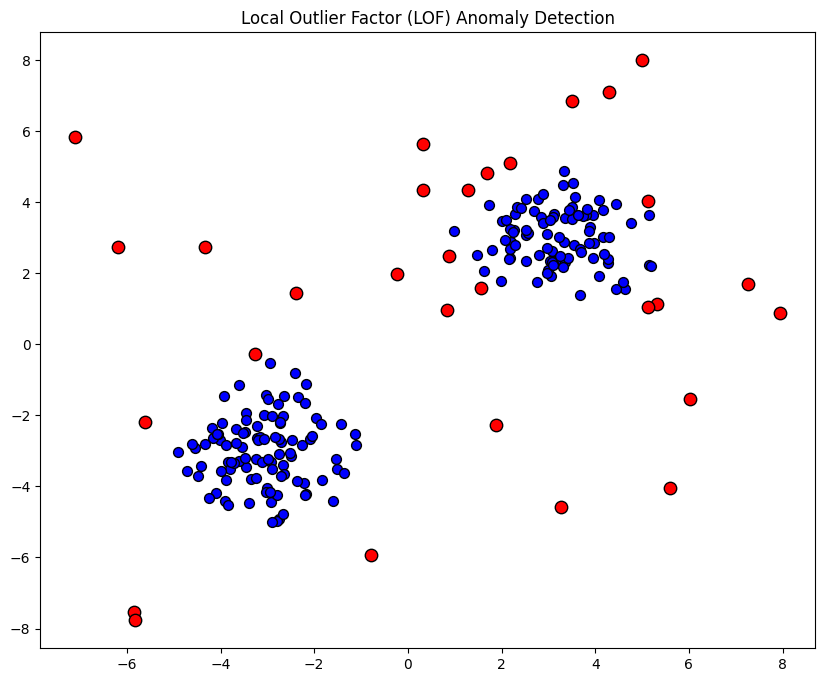

In [85]:
# Plot the data
plt.figure(figsize=(10, 8))
plt.title("Local Outlier Factor (LOF) Anomaly Detection")
# Plot inliers (blue)
plt.scatter(inliers[:, 0], inliers[:, 1], c='blue', label='Inliers', s=50, edgecolors='k')

# Plot outliers (red)
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', label='Outliers', s=80, edgecolors='k')

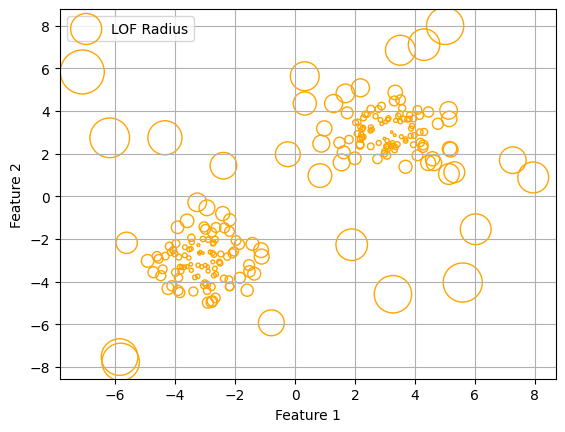

In [86]:
# Plotting circles with radius proportional to LOF scores
#LOF score based on densities of points and their neighbours, outliers has less density and inliers has high density
radius = (lof_scores.max() - lof_scores) / (lof_scores.max() - lof_scores.min())
plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='orange', facecolors='none', label='LOF Radius') # scale the radius for visibility

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

In [87]:
# Print some statistics
print("Number of Inliers:", len(inliers))
print("Number of Outliers:", len(outliers))

Number of Inliers: 190
Number of Outliers: 30


In [89]:
threshold = -1.5  # Example threshold

outliers = X[lof_scores < threshold] #Selects points where the negative LOF score is less than the threshold

inliers = X[lof_scores >= threshold] #Selects points where the negative LOF score is greater than or equal to the threshold

print(outliers)
# print(inliers)

[[-5.6197451  -2.1780975 ]
 [-3.26465683 -0.27983083]
 [ 3.51504769  6.85273149]
 [ 5.31465857  1.13273481]
 [ 5.1221562   4.03246526]
 [-0.24126734  1.97561236]
 [ 5.13303337  1.0479122 ]
 [ 2.18177932  5.09238728]
 [ 1.55191566  1.59253623]
 [ 0.87610428  2.47424498]
 [ 1.67976679  4.83145877]
 [ 1.28686547  4.35387237]
 [-7.09799205  5.83555802]
 [ 5.00641615  7.99548277]
 [ 7.94618939  0.88690729]
 [ 4.30379864  7.11625168]
 [ 5.59435825 -4.04243037]
 [-0.79129384 -5.93344936]
 [ 7.26481644  1.69879415]
 [-4.34171511  2.74721095]
 [ 1.89005185 -2.26939651]
 [-6.18307852  2.74517113]
 [ 0.32492321  4.35709427]
 [ 0.32261602  5.63490401]
 [ 0.83050942  0.97500754]
 [ 6.02645764 -1.54427414]
 [-5.85575634 -7.53947718]
 [ 3.26527629 -4.59257342]
 [-5.81805639 -7.76728535]
 [-2.39059906  1.43868299]]


#Here's the correct sequence and interpretation:

* **Original LOF Calculation (Internally):** The algorithm calculates values related to the original LOF scores (≥ 1). After calculating densities we have original LOF scores in which, scores ==1 or less than 1 are more denser means inliers and scores > 1 means 1.2,1.5,2,3... are outliers.

* **Inversion:** The values are inverted (effectively multiplied by -1). So, values close to 1 become close to -1, and values >> 1 become << -1 (more negative).

* **Offset (Important Detail):** The offset is applied to the inverted values. This shifts the distribution of the scores. When contamination is not 'auto', the offset is -0.5.

* **Final Negative LOF Scores (lof_scores):** The result of the inversion and offset is what you get in lof.negative_outlier_factor_. These scores are approximately in the range of -1 to -∞.

* **Predictions (predict() and decision_function)**
* **Threshold-Based Prediction:**
The predict() function classifies points as 1 (inlier) or -1 (outlier) using the contamination parameter. Here's how:

   Sort Scores: The negative LOF scores are sorted in ascending order (more negative → stronger outliers).

   Determine Threshold: The threshold for outliers is set based on the contamination proportion.

 For example, if contamination=0.1 (10% of data are outliers), the threshold is the score of the 10th percentile from the bottom.
* **Assign Labels:**
Score < Threshold: Predict -1 (outlier).
Score ≥ Threshold: Predict 1 (inlier).
* **Decision Function:**
The decision_function() returns the negative LOF scores directly. These can be used for custom thresholds or analysis.

* **Contamination Parameter (contamination)**
The contamination parameter determines how many points are labeled as outliers:

* contamination='auto' (Default):

* scikit-learn estimates the contamination proportion based on the data distribution.
*The threshold is dynamically determined, meaning predictions may not correspond exactly to a fixed percentile.
User-Defined Contamination (contamination=x):

* A fixed proportion (e.g., contamination=0.1) defines the percentage of points labeled as outliers.
Predictions strictly follow this proportion, irrespective of the negative LOF scores.
* **Example:**
* Let's say a point has an original LOF of 1.2 (slightly outlier).

 Inversion: 1 - 1.2 = -0.2

 Offset: -0.2 - 0.5 = -0.7 (This is the negative LOF score)

 Since -0.7 < 0, predict() would classify this point as an outlier (-1).

* Now, let's say another point has an original LOF of 1.01 (very close to 1, almost an inlier).

 Inversion: 1 - 1.01 = -0.01

 Offset: -0.01 - 0.5 = -0.51 (This is the negative LOF score)

 Since -0.51 < 0, predict() would still classify this point as an outlier (-1), although it is very close to the decision boundary.

**Even there are many negative score points it only take most neagtive points as outliers not every negative value , Based on default contamiantion value or custom thershold.**
